In [45]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
#%pip install SQLAlchemy 

## CSV

In [46]:
df_team = pd.read_csv('../csv/team.csv')
#df_team_info_common = pd.read_csv(r'C:\Users\Usuario\Desktop\csv\team_info_common.csv')
#df_team_history = pd.read_csv(r'C:\Users\Usuario\Desktop\csv\team_history.csv')
df_team_details = pd.read_csv('../csv/team_details.csv')
df_player = pd.read_csv('../csv/player.csv')
#df_play_by_play = pd.read_csv(r'C:\Users\Usuario\Desktop\csv\play_by_play.csv')
df_other_stats = pd.read_csv('../csv/other_stats.csv')
#df_officials = pd.read_csv(r'C:\Users\Usuario\Desktop\csv\officials.csv')
#df_line_score = pd.read_csv(r'C:\Users\Usuario\Desktop\csv\line_score.csv', parse_dates=['game_date_est'])
#df_inactive_players = pd.read_csv(r'C:\Users\Usuario\Desktop\csv\inactive_players.csv')
#df_game = pd.read_csv(r'C:\Users\Usuario\Desktop\csv\game.csv', parse_dates=['game_date'])
#df_game_summary = pd.read_csv(r'C:\Users\Usuario\Desktop\csv\game_summary.csv', parse_dates=['game_date_est'])
#df_game_info = pd.read_csv(r'C:\Users\Usuario\Desktop\csv\game_info.csv', parse_dates=['game_date'])
df_draft_history = pd.read_csv('../csv/draft_history.csv')
df_draft_combine_stats = pd.read_csv('../csv/draft_combine_stats.csv')
#df_common_player_info = pd.read_csv(r'C:\Users\Usuario\Desktop\csv\common_player_info.csv', parse_dates=['birthdate'])
df_salaries= pd.read_csv('data/nba_salaries_db.csv')


# EDA Drafts

In [47]:
df_draft_history.head(5)

,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag
0,79299,Clifton McNeeley,1947,1,1,1,Draft,1610610031,Pittsburgh,Ironmen,PIT,Texas-El Paso,College/University,0
1,78109,Glen Selbo,1947,1,2,2,Draft,1610610035,Toronto,Huskies,HUS,Wisconsin,College/University,1
2,76649,Eddie Ehlers,1947,1,3,3,Draft,1610612738,Boston,Celtics,BOS,Purdue,College/University,1
3,79302,Walt Dropo,1947,1,4,4,Draft,1610610032,Providence,Steamrollers,PRO,Connecticut,College/University,0
4,77048,Dick Holub,1947,1,5,5,Draft,1610612752,New York,Knicks,NYK,Long Island-Brooklyn,College/University,1


In [48]:
#comprobar cantidad de organizaciones de las que provienen los drafts
df_draft_history['organization_type'].unique()

array(['College/University', nan, 'High School', 'Other Team/Club'],
      dtype=object)

In [49]:
df_draft_history.shape

(7990, 14)

In [50]:
#filtrar datos de 2013 en adelante
df_draft_history=df_draft_history[df_draft_history['season']>=2013]
df_draft_history.shape

(596, 14)

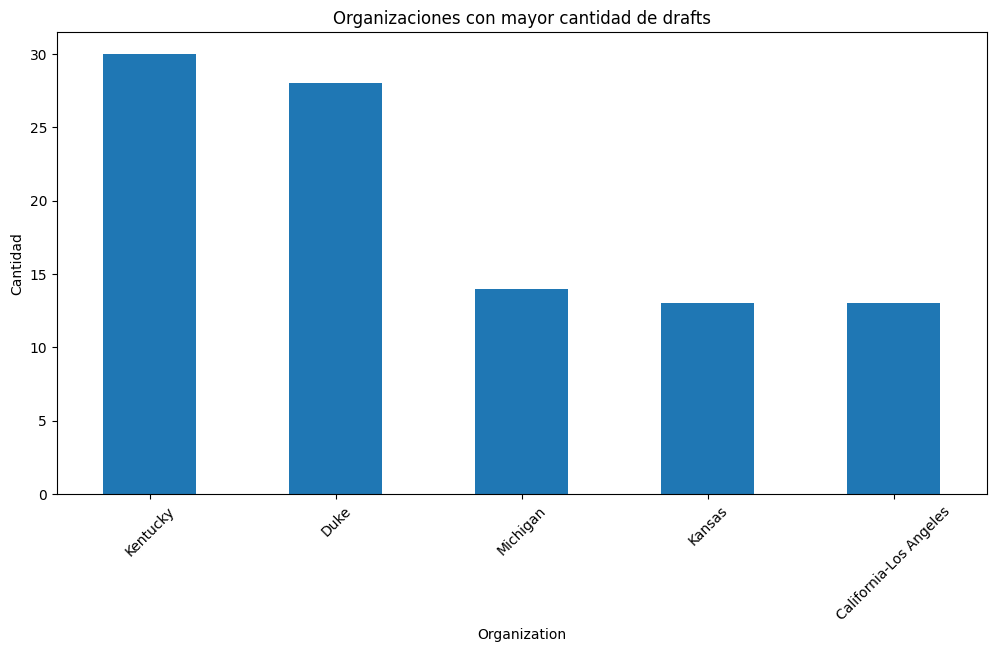

In [51]:
#Organizaciones con mayor cantidad de drafts
import matplotlib.pyplot as plt

# Obtener los 10 valores más comunes en la columna "organization"
top_10_organizations = df_draft_history['organization'].value_counts().nlargest(5)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6))
top_10_organizations.plot(kind='bar')
plt.title('Organizaciones con mayor cantidad de drafts')
plt.xlabel('Organization')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()


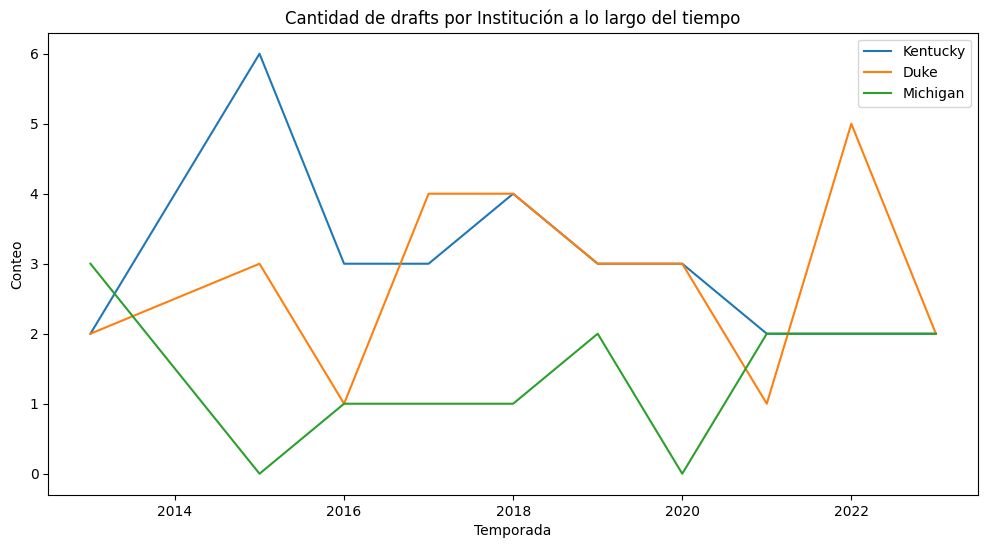

In [52]:
#Orígenes de drafts a lo largo de la historia
import matplotlib.pyplot as plt

# Obtener los 5 valores más comunes de 'organization'
top_organizations = df_draft_history['organization'].value_counts().nlargest(3).index

# Filtrar el DataFrame para incluir solo las filas con esos valores de 'organization'
filtered_df = df_draft_history[df_draft_history['organization'].isin(top_organizations)]

# Agrupar los datos por 'season' y 'organization' y contar el número de ocurrencias
grouped_data = filtered_df.groupby(['season', 'organization']).size().unstack(fill_value=0)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
for organization in top_organizations:
    plt.plot(grouped_data.index, grouped_data[organization], label=organization)

plt.title('Cantidad de drafts por Institución a lo largo del tiempo')
plt.xlabel('Temporada')
plt.ylabel('Conteo')
plt.legend()
plt.show()


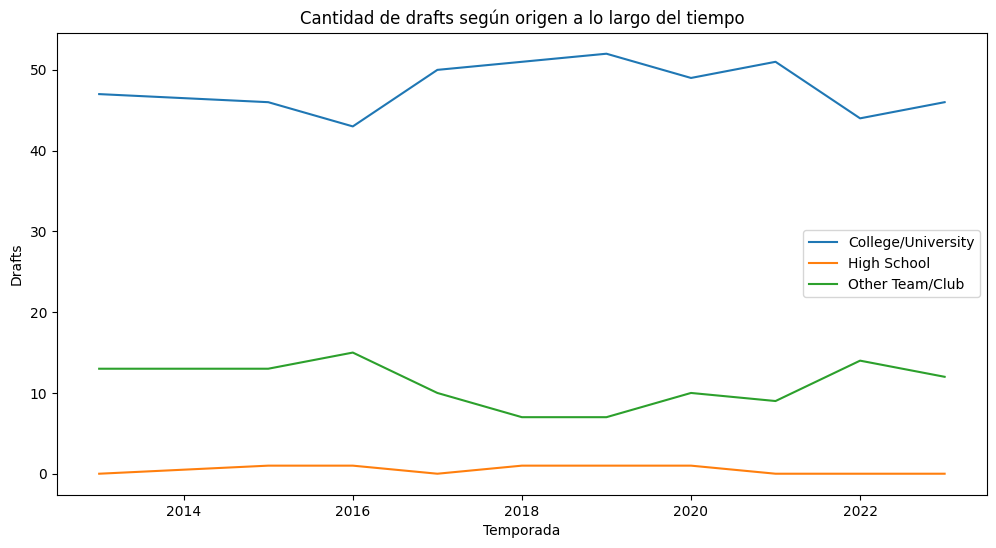

In [53]:
import matplotlib.pyplot as plt

# Filtrar el DataFrame para incluir solo las columnas 'season' y 'organization_type'
filtered_df = df_draft_history[['season', 'organization_type']]

# Agrupar los datos por 'season' y 'organization_type' y contar el número de ocurrencias
grouped_data = filtered_df.groupby(['season', 'organization_type']).size().unstack(fill_value=0)

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))
for organization_type in grouped_data.columns:
    plt.plot(grouped_data.index, grouped_data[organization_type], label=organization_type)

plt.title('Cantidad de drafts según origen a lo largo del tiempo')
plt.xlabel('Temporada')
plt.ylabel('Drafts')
plt.legend()
plt.show()


In [54]:
# Traer columna 'Position' del dataframe 'df_draft_combine_stats'


# Seleccionar solo las columnas 'player_id' y 'position' de df_draft_combine_stats
df_position = df_draft_combine_stats[['player_id', 'position']]

# Fusionar los DataFrames en base a la columna 'person_id' de df_draft_history y 'player_id' de df_draft_combine_stats
df_draft_history2 = pd.merge(df_draft_history, df_position, left_on='person_id', right_on='player_id', how='left')
df_draft_history2 = df_draft_history2.drop(columns=['player_id'])

# Mostrar el DataFrame resultante
df_draft_history2


,person_id,player_name,season,round_number,round_pick,overall_pick,draft_type,team_id,team_city,team_name,team_abbreviation,organization,organization_type,player_profile_flag,position
0,203461,Anthony Bennett,2013,1,1,1,Draft,1610612739,Cleveland,Cavaliers,CLE,Nevada-Las Vegas,College/University,1,NaN
1,203506,Victor Oladipo,2013,1,2,2,Draft,1610612753,Orlando,Magic,ORL,Indiana,College/University,1,SG
2,203490,Otto Porter Jr.,2013,1,3,3,Draft,1610612764,Washington,Wizards,WAS,Georgetown,College/University,1,SF
3,203469,Cody Zeller,2013,1,4,4,Draft,1610612766,Charlotte,Bobcats,CHA,Indiana,College/University,1,C-PF
4,203458,Alex Len,2013,1,5,5,Draft,1610612756,Phoenix,Suns,PHX,Maryland,College/University,1,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,1631209,Isaiah Wong,2023,2,25,55,Draft,1610612754,Indiana,Pacers,IND,Miami (FL),College/University,1,SG
608,1641844,Tarik Biberovic,2023,2,26,56,Draft,1610612763,Memphis,Grizzlies,MEM,Fenerbahce S.K. (Turkey),Other Team/Club,1,NaN
609,1631218,Trayce Jackson-Davis,2023,2,27,57,Draft,1610612764,Washington,Wizards,WAS,Indiana,College/University,1,C
610,1631218,Trayce Jackson-Davis,2023,2,27,57,Draft,1610612764,Washington,Wizards,WAS,Indiana,College/University,1,C


In [55]:
#cantidad de drafts por posición
df_draft_history2['position'].unique()

array([nan, 'SG', 'SF', 'C-PF', 'C', 'PG', 'PG-SG', 'PF-C', 'SF-SG',
       'SG-SF', 'PF-SF', 'PF', 'SF-PF', 'SG-PG'], dtype=object)

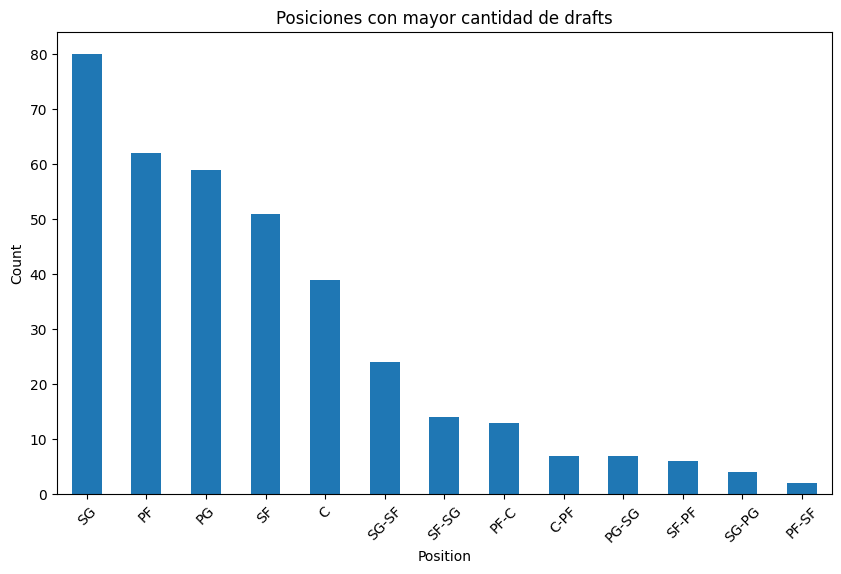

In [56]:
# Posiciones con más drafts
# 
# # Eliminar los valores NaN de la columna 'position'
df_draft_history2_filtered = df_draft_history2.dropna(subset=['position'])

# Contar la frecuencia de cada valor en la columna 'position'
position_counts = df_draft_history2_filtered['position'].value_counts()

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
position_counts.plot(kind='bar')
plt.xlabel('Position')
plt.ylabel('Count')
plt.title('Posiciones con mayor cantidad de drafts')
plt.xticks(rotation=45)
plt.show()

Las 3 posiciones para las que hay mas drafts son SG (Shooting Guard), PF (Power Forward - Center) y PG (Point Guard)

# EDA Jugadores


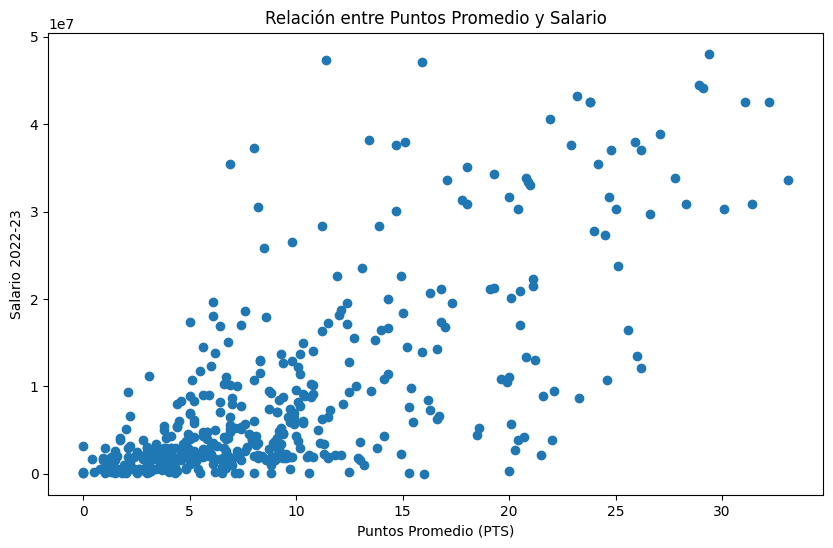

In [57]:
#Relación entre puntos y salario 

plt.figure(figsize=(10, 6))
plt.scatter(df_salaries['PTS'], df_salaries['salary_2022_23'])

# Añadir etiquetas y título
plt.xlabel('Puntos Promedio (PTS)')
plt.ylabel('Salario 2022-23')
plt.title('Relación entre Puntos Promedio y Salario')

# Mostrar el gráfico
plt.show()

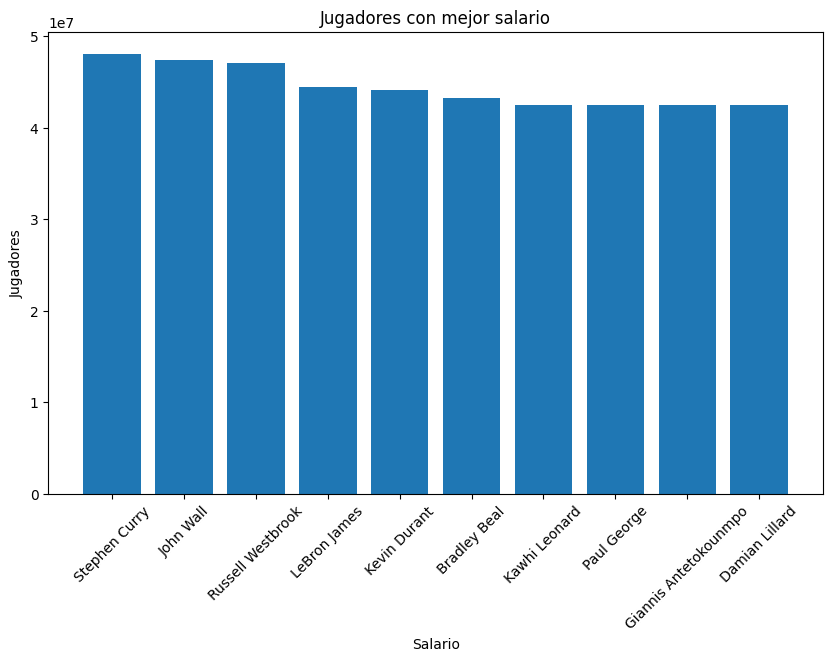

In [58]:
# 10 Jugadores con mejor salario

_10_mejor_salario=df_salaries.nlargest(10, 'salary_2022_23')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(_10_mejor_salario['full_name'], _10_mejor_salario['salary_2022_23'])

# Añadir etiquetas y título
plt.xlabel('Salario')
plt.ylabel('Jugadores')
plt.title('Jugadores con mejor salario')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

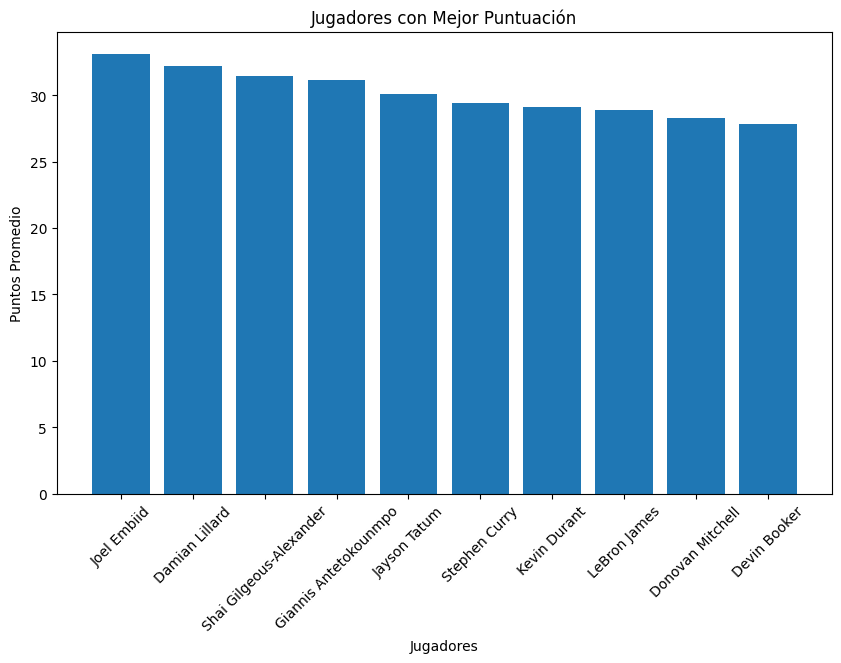

In [59]:
#10 jugadores con mejor puntuación

_10_mejor_puntuacion = df_salaries.nlargest(10, 'PTS')

# Ordenar el DataFrame por la columna 'PTS' en orden descendente
_10_mejor_puntuacion = _10_mejor_puntuacion.sort_values(by='PTS', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(_10_mejor_puntuacion['full_name'], _10_mejor_puntuacion['PTS'])

# Añadir etiquetas y título
plt.xlabel('Jugadores')
plt.ylabel('Puntos Promedio')
plt.title('Jugadores con Mejor Puntuación')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()


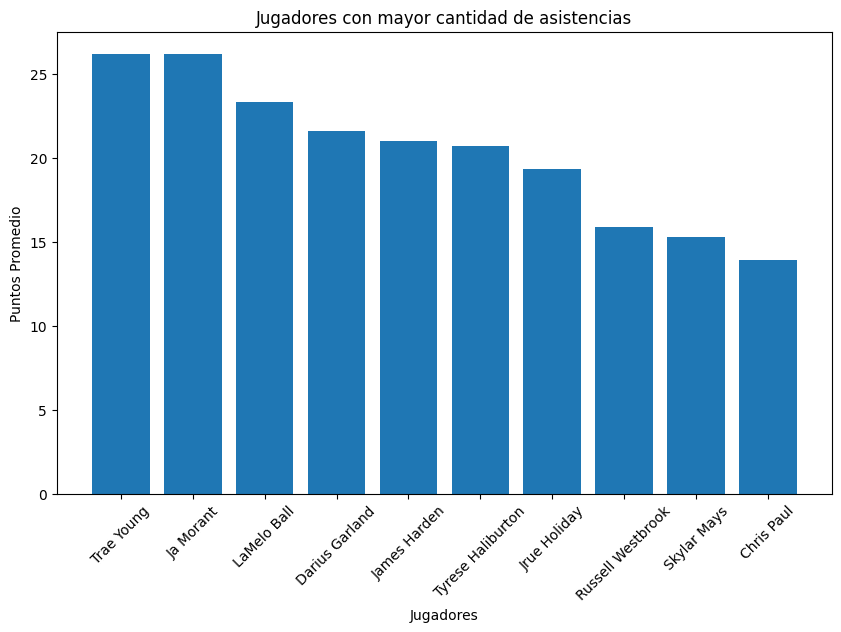

In [60]:
# 10 jugadores con mayores asistencias 
_10_mayor_asistencias = df_salaries.nlargest(10, 'AST')

# Ordenar el DataFrame por la columna 'PTS' en orden descendente
_10_mayor_asistencias = _10_mayor_asistencias.sort_values(by='PTS', ascending=False)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(_10_mayor_asistencias['full_name'], _10_mayor_asistencias['PTS'])

# Añadir etiquetas y título
plt.xlabel('Jugadores')
plt.ylabel('Puntos Promedio')
plt.title('Jugadores con mayor cantidad de asistencias')
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.show()

# EDA Prospectos a contratar

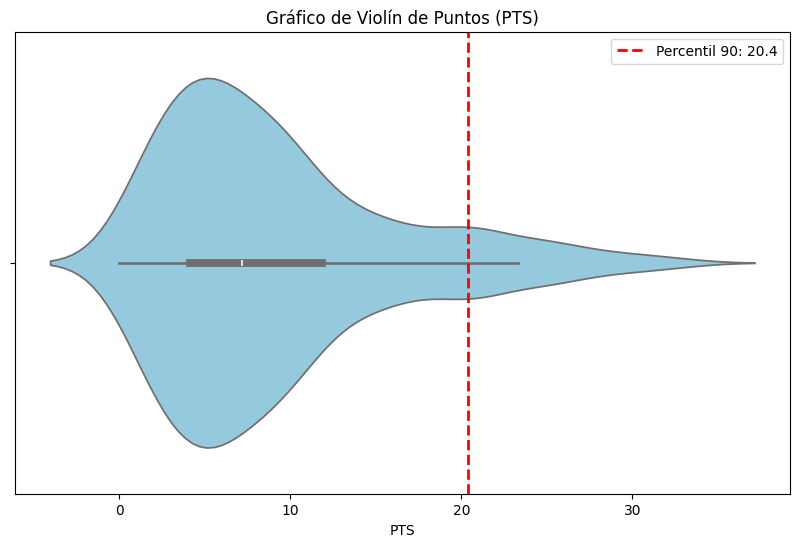

In [61]:
#Encontrar percentil 90 de puntos anotados



percentil_90 = df_salaries['PTS'].quantile(0.90)

# Crear el gráfico de violín
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_salaries['PTS'], color="skyblue")

# Añadir una línea para el percentil 90
plt.axvline(percentil_90, color='red', linestyle='--', linewidth=2, label=f'Percentil 90: {percentil_90:.1f}')

# Añadir etiquetas y título
plt.title('Gráfico de Violín de Puntos (PTS)')
plt.xlabel('PTS')
plt.legend()

# Mostrar el gráfico
plt.show()


Los jugadores que están por encima del 90% en términos de puntos, son los que tienen más de 20,4 puntos por promedio

### Se creó un indice de rendimiento individual que contemplaba diferentes aspectos de forma integral para determinar el desempeño de un jugador

In [62]:
IRI= df_salaries['PTS'] + (0.7 * df_salaries['TRB']) + (0.7 * df_salaries['AST']) + (0.5 * df_salaries['STL']) + (0.5 * df_salaries['BLK']) - (0.7 * df_salaries['TOV'])

In [63]:
df_salaries2=df_salaries

In [64]:
#Se sañadió como columna al dataframe y se agregó también una columna de clasificación según dicho indicador

# Calcular el IRI
df_salaries2['IRI'] = (df_salaries2['PTS'] +
                       0.7 * df_salaries2['TRB'] +
                       0.7 * df_salaries2['AST'] +
                       0.5 * df_salaries2['STL'] +
                       0.5 * df_salaries2['BLK'] -
                       0.7 * df_salaries2['TOV'])

# Calcular los percentiles
percentile_90 = df_salaries2['IRI'].quantile(0.9)
percentile_70 = df_salaries2['IRI'].quantile(0.7)
percentile_50 = df_salaries2['IRI'].quantile(0.5)
percentile_30 = df_salaries2['IRI'].quantile(0.3)

# Crear la columna de Categoría IRI
def categorize_iri(iri):
    if iri >= percentile_90:
        return 'Excelente'
    elif iri >= percentile_70:
        return 'Muy Bueno'
    elif iri >= percentile_50:
        return 'Bueno'
    elif iri >= percentile_30:
        return 'Promedio'
    else:
        return 'Bajo'

df_salaries2['Categoría IRI'] = df_salaries2['IRI'].apply(categorize_iri)

In [65]:
percentil_90 = df_salaries2['IRI'].quantile(0.90)

print(f"El percentil 90 de la columna 'IRI' es: {percentil_90}")


El percentil 90 de la columna 'IRI' es: 26.08


### Se estableció que las condiciones para ser un prospecto de contratación serían: 
* Tener categoría IRI = Excelente (Rendimiento mayor al percentil 90)
* Tener menos de 26 años
* Ganar menos de 10 Millones de dolares anuales
* Haber jugado al menos 25 partidos

Los resultados obtenidos fueron los siguientes:

In [66]:
nuevos_contratados=df_salaries2[(df_salaries2['Categoría IRI']== 'Excelente') & (df_salaries2['age']< 26) & (df_salaries2['salary_2022_23']< 10000000) & (df_salaries2['GP']>25)].sort_values(by='salary_2022_23', ascending=False)
nuevos_contratados

,player_id,full_name,salary_2022_23,position,age,team,GP,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,IRI,Categoría IRI
137,1629636,Darius Garland,8920794,PG,23,CLE,69,69,35.5,7.6,...,2.3,2.7,7.8,1.2,0.1,2.9,2.1,21.6,27.57,Excelente
142,1630163,LaMelo Ball,8623920,PG,21,CHO,36,36,35.2,8.2,...,5.3,6.4,8.4,1.3,0.3,3.6,3.3,23.3,31.94,Excelente
217,1630169,Tyrese Haliburton,4215120,PG,22,IND,56,56,33.6,7.4,...,3.1,3.7,10.4,1.6,0.4,2.5,1.2,20.7,29.82,Excelente
230,1629640,Keldon Johnson,3873024,SF,23,SAS,63,63,32.7,8.0,...,4.2,5.0,2.9,0.7,0.2,2.1,2.0,22.0,26.51,Excelente
310,1630217,Desmond Bane,2130240,SG,24,MEM,58,58,31.7,7.8,...,4.3,5.0,4.4,1.0,0.4,2.2,2.6,21.5,27.24,Excelente


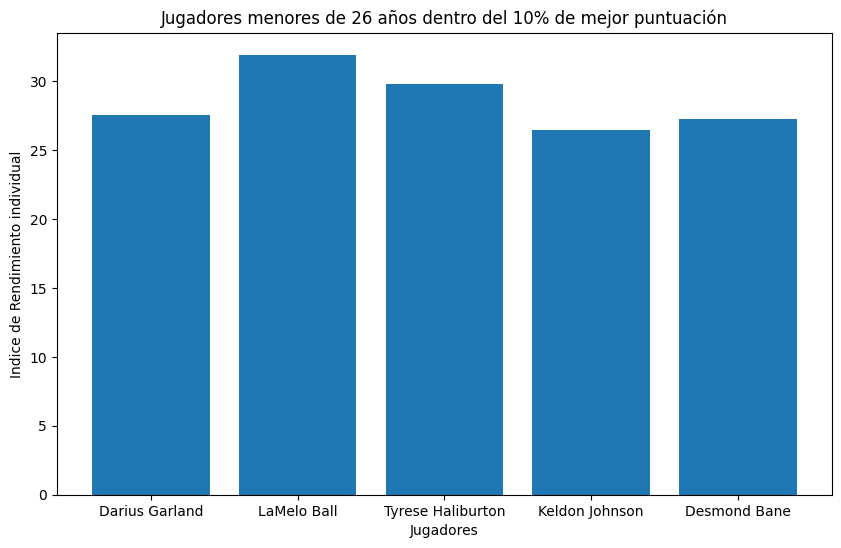

In [67]:
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(nuevos_contratados['full_name'], nuevos_contratados['IRI'])

# Añadir etiquetas y título
plt.xlabel('Jugadores')
plt.ylabel('Indice de Rendimiento individual')
plt.title('Jugadores menores de 26 años dentro del 10% de mejor puntuación')

# Mostrar el gráfico
plt.show()